## 기본적인 패키지 로드 

In [14]:
import numpy as np 
import pandas as pd
import os
import glob
import re
import sys

## 파일 로드

In [2]:
files = glob.glob('dataset/*.csv')

In [3]:
data = []
for i in files :
    i = re.sub("dataset/", "", i)
    data.append(re.sub(".csv","",i))

In [4]:
for i in range(len(files)) :
    globals()[data[i]] = pd.read_csv(files[i])

## 파일 이름들 확인

In [5]:
data

['TimeAge',
 'SearchTrend',
 'TimeProvince',
 'Weather',
 'PatientRoute',
 'PatientInfo',
 'Region',
 'TimeGender',
 'Case',
 'Time']

## visualization 위한 패키지 로드

In [15]:
import plotnine
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation, rc

## 간단하게 연습

In [20]:
merged_inf_case = pd.merge(PatientInfo,Case,
        how='left',
        on='infection_case',
        )

In [23]:
merged_inf_case['infection_case'].value_counts()

contact with patient                4240
etc                                 3740
Shincheonji Church                  1290
Guro-gu Call Center                  306
overseas inflow                      305
Onchun Church                         66
Cheongdo Daenam Hospital              63
gym facility in Cheonan               60
Ministry of Oceans and Fisheries      27
Dongan Church                         17
Eunpyeong St. Mary's Hospital         14
Seongdong-gu APT                      13
gym facility in Sejong                 4
Suyeong-gu Kindergarten                3
Pilgrimage to Israel                   1
River of Grace Community Church        1
Name: infection_case, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

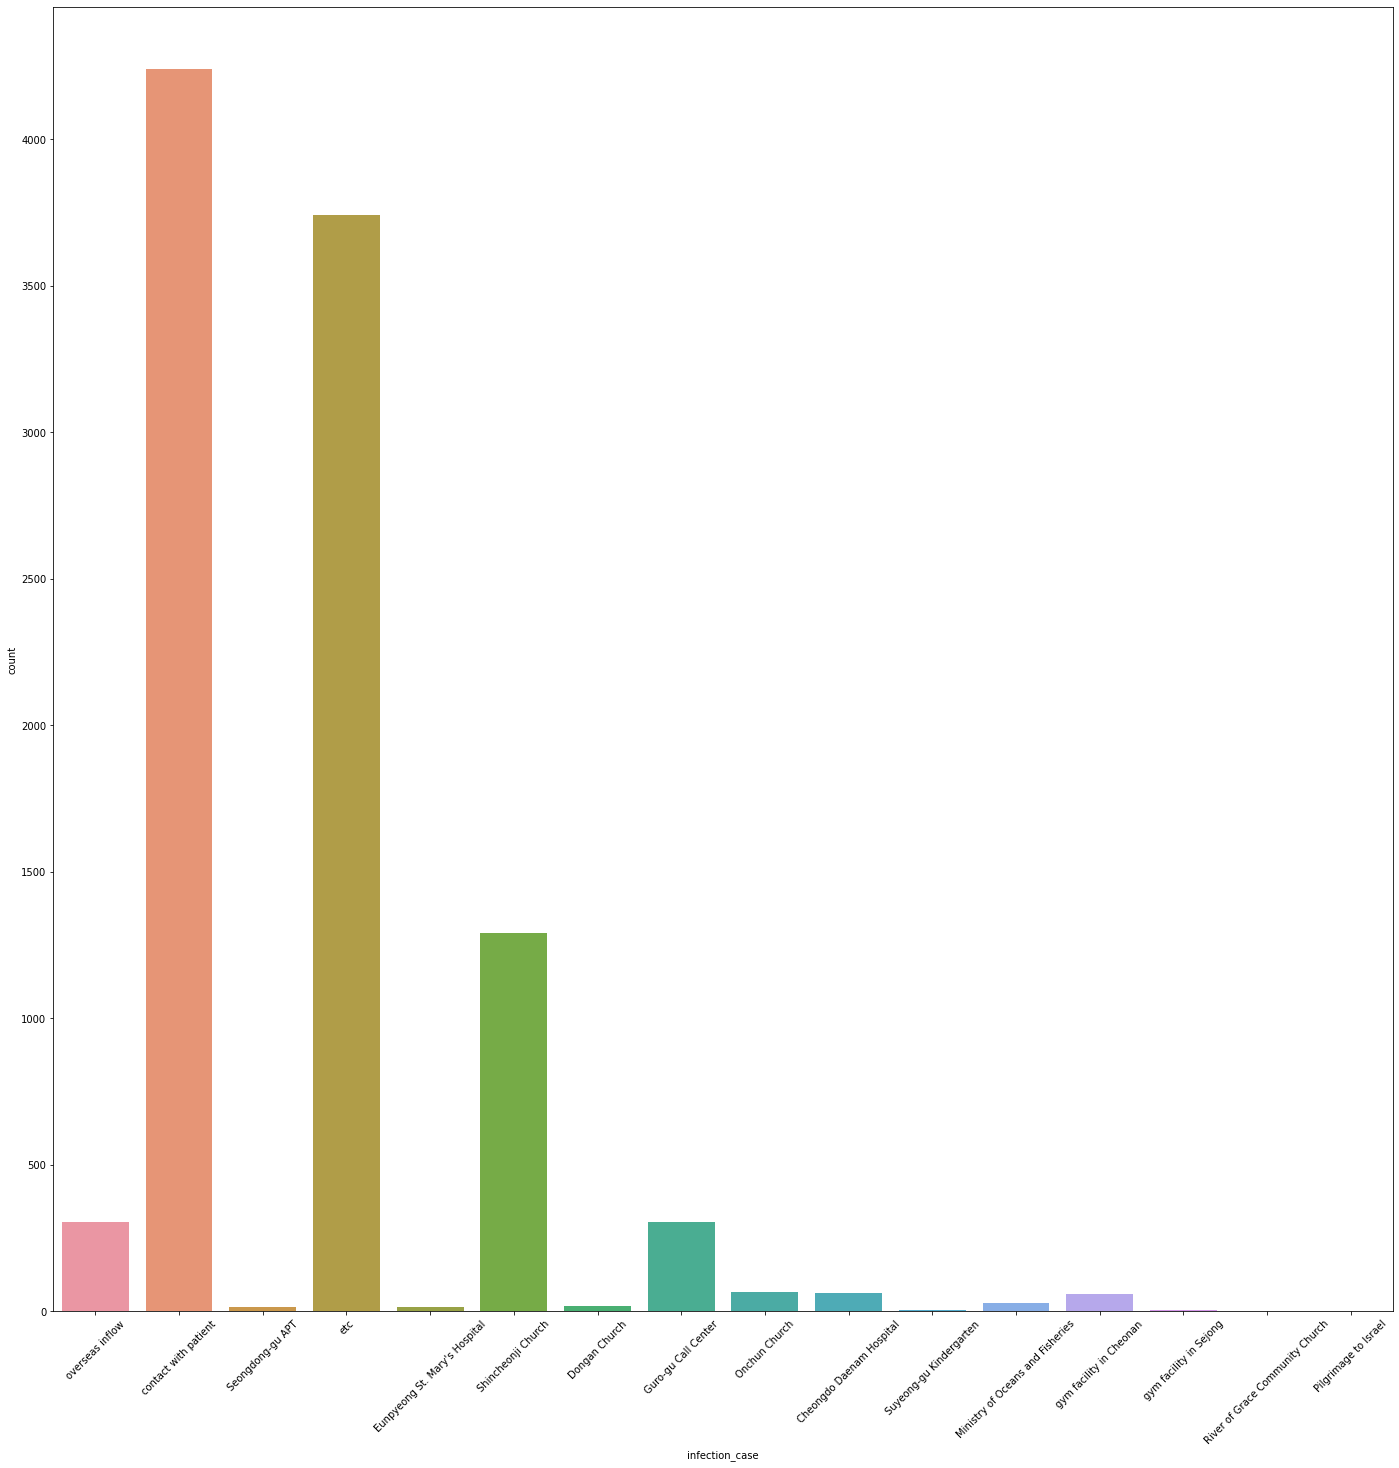

In [38]:
plt.figure(figsize=(24,24))
h = sns.countplot(x='infection_case',data=merged_inf_case)
plt.xticks(rotation=45)

### 문득 그런 생각을 했다. 감염자들이 돌아다니는 동영상을 만들고 싶다.

그렇다면 왠지 R 이 더 편리해보인다. 근데 ipynb 파일만 된다고 하니 욕지거리를 한번 해야겠다. 주최자는 R 커널 안 깔아주겠지
아무튼 일단 대한민국의 그림을 그리는 것으로 시작해보자.

In [1]:
import geopandas as gpd

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
korea = world[world["iso_a3"] == "KOR"]

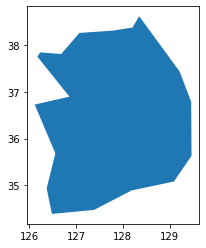

In [12]:
korea.plot();

떼잉.. 이게뭐야..

In [22]:
trial = gpd.read_file("CTPRVN_201905")

In [23]:
trial.head()

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,¼­¿ïÆ¯º°½Ã,"POLYGON ((966987.226 1941110.946, 966987.119 1..."
1,26,Busan,ºÎ»ê±¤¿ª½Ã,"MULTIPOLYGON (((1138209.365 1673609.179, 11381..."
2,27,Daegu,´ë±¸±¤¿ª½Ã,"POLYGON ((1107777.593 1780522.269, 1107845.409..."
3,28,Incheon,ÀÎÃµ±¤¿ª½Ã,"MULTIPOLYGON (((909743.413 1946023.117, 909736..."
4,29,Gwangju,±¤ÁÖ±¤¿ª½Ã,"POLYGON ((932712.687 1696168.692, 932781.680 1..."


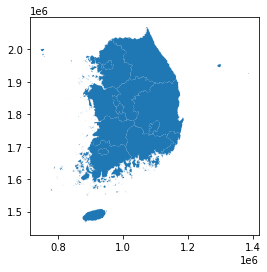

In [24]:
trial.plot()

오 일단 조금의 성공을 한듯 위도경도는 어찌되는거지 내일 다시 시도한다